In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load California housing data
housing = fetch_california_housing(as_frame=True)
data = housing.frame


In [2]:
# Load US States shapefile (from Natural Earth or US Census Bureau)
# You can download from: https://www2.census.gov/geo/tiger/GENZ2022/shp/
states = gpd.read_file("cb_2022_us_state_20m/cb_2022_us_state_20m.shp")

# Filter for California and neighboring states
west_states = states[states['STUSPS'].isin(['CA', 'OR', 'NV', 'AZ'])]

# Convert housing data into GeoDataFrame
gdf = gpd.GeoDataFrame(
    data, 
    geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']),
    crs="EPSG:4326"
)


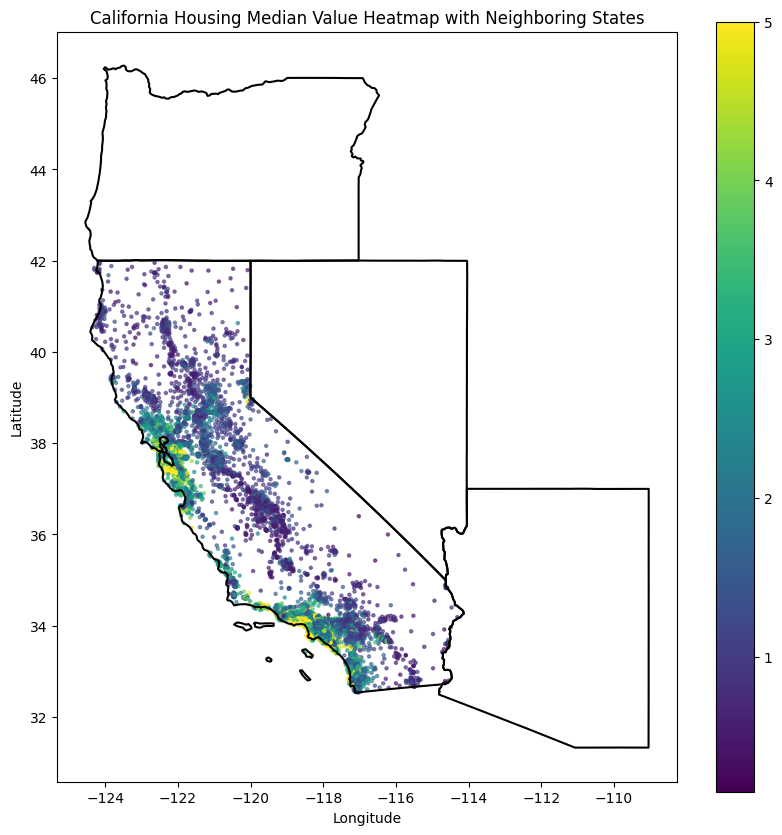

In [3]:
# Plot
fig, ax = plt.subplots(figsize=(10, 10))
west_states.boundary.plot(ax=ax, color="black")

# Plot housing prices as heatmap (scatter with color map)
gdf.plot(
    ax=ax, 
    column='MedHouseVal', 
    cmap='viridis', 
    markersize=5, 
    legend=True,
    alpha=0.6
)

plt.title("California Housing Median Value Heatmap with Neighboring States")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [4]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

heat_data = [
    [row['Latitude'], row['Longitude'], row['MedHouseVal']]
    for _, row in data.iterrows()
]

HeatMap(heat_data, radius=10, max_zoom=13, blur=15, gradient=None).add_to(m)

m.save("california_heatmap_interactive.html")


In [5]:
import plotly.express as px

# Assuming 'data' is your California housing dataframe with 'Latitude', 'Longitude', 'MedHouseVal'

# Add a column for actual median house value in dollars
data['MedHouseVal_Dollars'] = round(data['MedHouseVal'] * 100000, 0)

fig = px.scatter_mapbox(
    data,
    lat="Latitude",
    lon="Longitude",
    color="MedHouseVal_Dollars",
    color_continuous_scale="Viridis",
    zoom=5,
    height=900,
    width=1500,
    mapbox_style="carto-positron",
    title="California Housing Values Heatmap",
)

# Customize colorbar ticks and labels
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Median House Value ($)",
        tickvals=[100000, 300000, 500000],
        ticktext=["100k", "300k", "500k"],
        ticks="outside",
        ticklen=8,
        tickfont=dict(size=12),
    )
)

# Export to HTML file
fig.write_html("california_house_values_heatmap_plotly.html")

fig.show()



[Interactive California Heatmap](https://mickeyadd.github.io/my_risk_toolkit/Machine%20Learning%20Notes/Classification%20Models/california_heatmap_custom.html)

[Interactive California Heatmap Plotly](https://mickeyadd.github.io/my_risk_toolkit/Machine%20Learning%20Notes/Classification%20Models/california_house_values_heatmap_plotly.html)

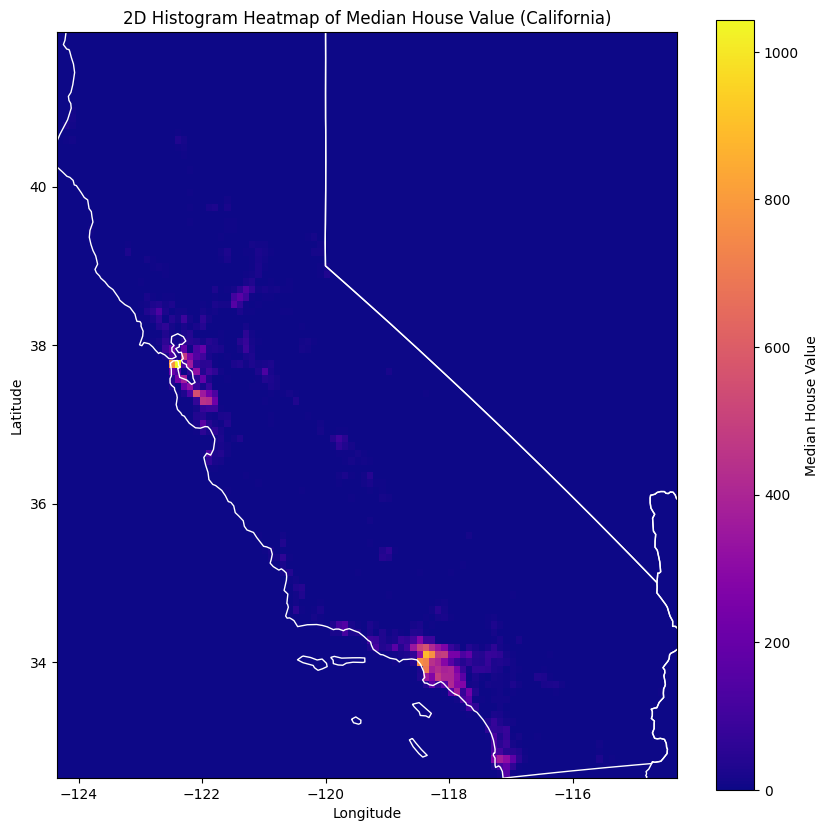

In [6]:
plt.figure(figsize=(10, 10))
plt.hist2d(
    data['Longitude'], data['Latitude'],
    bins=100,
    weights=data['MedHouseVal'],
    cmap='plasma'
)

west_states.boundary.plot(ax=plt.gca(), color='white', linewidth=1)

plt.colorbar(label='Median House Value')
plt.title("2D Histogram Heatmap of Median House Value (California)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [7]:
import os
print(os.getcwd())


/Users/michaeladdington/Desktop/quant_finance/Machine Learning Notes/Classification Models


In [8]:
import webbrowser
import os

# Get absolute path to file
file_path = os.path.abspath("california_heatmap_interactive.html")

# Open in system default browser
webbrowser.open("file://" + file_path)



True

In [9]:
import folium
from folium.plugins import HeatMap
from folium import Element
import os

def plot_california_heatmap(data, output_file="california_heatmap.html", add_markers=True):
    """
    Creates an interactive Folium heatmap of California housing values.

    Parameters:
    - data: DataFrame with 'Latitude', 'Longitude', 'MedHouseVal'
    - output_file: Filename for saved HTML map
    - add_markers: Boolean to add city markers (default True)
    """
    # Create base map
    m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

    # Prepare heatmap data
    heat_data = [
        [row['Latitude'], row['Longitude'], row['MedHouseVal']]
        for _, row in data.iterrows()
    ]

    # Add heatmap layer
    HeatMap(heat_data, radius=10, max_zoom=13, blur=15).add_to(m)

    # Add custom legend
    legend_html = """
    <div style="
        position: fixed; 
        bottom: 50px; left: 50px; width: 160px; height: 130px; 
        border:2px solid grey; z-index:9999; font-size:14px;
        background-color:white;
        padding: 10px;
        ">
        <b>Median House Value</b><br>
        <i style="background: #0d0887; width: 18px; height: 18px; float: left; margin-right: 8px"></i> Low<br>
        <i style="background: #6a00a8; width: 18px; height: 18px; float: left; margin-right: 8px"></i> Medium<br>
        <i style="background: #f0f921; width: 18px; height: 18px; float: left; margin-right: 8px"></i> High
    </div>
    """
    m.get_root().html.add_child(Element(legend_html))

    # Add title
    title_html = '''
         <h3 align="center" style="font-size:20px"><b>California Housing Value Heatmap</b></h3>
         '''
    m.get_root().html.add_child(Element(title_html))

    # Optional city markers
    if add_markers:
        cities = {
            "Los Angeles": [34.0522, -118.2437],
            "San Francisco": [37.7749, -122.4194],
            "San Diego": [32.7157, -117.1611],
            "Sacramento": [38.5816, -121.4944],
        }
        for city, coords in cities.items():
            folium.Marker(
                location=coords,
                popup=city,
                icon=folium.Icon(color="blue", icon="info-sign")
            ).add_to(m)

    # Save to file
    m.save(output_file)
    print(f"Map saved to {output_file}")

    # Open in browser
    file_path = os.path.abspath(output_file)

    import webbrowser
    webbrowser.open("file://" + file_path)



In [10]:
plot_california_heatmap(data, "california_heatmap_custom.html", add_markers=True)


Map saved to california_heatmap_custom.html


In [11]:
import folium
from folium.plugins import HeatMap
from folium import Element
import os
import webbrowser

def plot_california_heatmap(data, output_file="california_heatmap.html", add_markers=True):
    """
    Creates an interactive Folium heatmap of California housing values
    with a continuous colorbar legend matching Folium's default heatmap
    colors and optional city markers.

    Parameters:
    - data: DataFrame with 'Latitude', 'Longitude', 'MedHouseVal'
            (MedHouseVal assumed to be in 100k's, e.g. 2.5 = $250k)
    - output_file: Filename for saved HTML map
    - add_markers: Boolean to add city markers (default True)
    """
    m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

    heat_data = [
        [row['Latitude'], row['Longitude'], row['MedHouseVal']]
        for _, row in data.iterrows()
    ]

    HeatMap(heat_data, radius=10, max_zoom=13, blur=15).add_to(m)

    # Compute min, quartiles, max values scaled to actual dollars
    min_val = int(data['MedHouseVal'].min() * 100000)
    q1 = int(data['MedHouseVal'].quantile(0.25) * 100000)
    q2 = int(data['MedHouseVal'].quantile(0.5) * 100000)
    max_val = int(data['MedHouseVal'].max() * 100000)

    legend_html = f'''
    <div style="
        position: fixed;
        bottom: 50px;
        left: 50px;
        width: 320px;
        height: 70px;
        background: white;
        border:2px solid grey;
        z-index:9999;
        font-size:14px;
        padding: 10px;
        ">
        <b>Median House Value</b><br>
        <div style="
          height: 20px;
          background: linear-gradient(to right, 
            blue, 
            cyan, 
            lime, 
            yellow, 
            red);
          margin-top: 5px;
          margin-bottom: 5px;
          border: 1px solid #ccc;
        "></div>
        <div style="display: flex; justify-content: space-between; font-weight: bold;">
            <span>${min_val:,}</span>
            <span>${q1:,}</span>
            <span>${q2:,}</span>
            <span>${max_val:,}+</span>
        </div>
    </div>
    '''
    m.get_root().html.add_child(Element(legend_html))

    title_html = '''
         <h3 align="center" style="font-size:20px"><b>California Housing Value Heatmap</b></h3>
         '''
    m.get_root().html.add_child(Element(title_html))

    if add_markers:
        cities = {
            "Los Angeles": [34.0522, -118.2437],
            "San Francisco": [37.7749, -122.4194],
            "San Diego": [32.7157, -117.1611],
            "Sacramento": [38.5816, -121.4944],
        }
        for city, coords in cities.items():
            folium.Marker(
                location=coords,
                popup=city,
                icon=folium.Icon(color="blue", icon="info-sign")
            ).add_to(m)

    m.save(output_file)
    print(f"Map saved to {output_file}")

    file_path = os.path.abspath(output_file)
    webbrowser.open("file://" + file_path)


In [12]:
plot_california_heatmap(data, output_file="california_heatmap_continuous.html")


Map saved to california_heatmap_continuous.html
